In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
import math

riverstation_id = 1
all_levels = pd.read_csv('./csv/rivers.csv')
river = all_levels[all_levels['riverstation_id'] == riverstation_id]['level'].values

# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

/Users/bartosz/Documents/EE475/ml/venv/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
def train_test_split(dataset, train_frac):
    train_size = int(len(dataset)*train_frac)
    return dataset[:train_size, :], dataset[train_size: ,:]

def create_datasets(dataset, look_back=1, look_ahead=1):
    data_x, data_y = [], []
    for i in range(len(dataset)-look_back-look_ahead+1):
        window = dataset[i:(i+look_back), 0]
        data_x.append(window)
        data_y.append(dataset[i + look_back + look_ahead -1, 0])
    return np.array(data_x), np.array(data_y)

def reverse_scale(data, mean, std):
    for x in np.nditer(data, op_flags=['readwrite']):
        x[...] = x*std + mean
    return data

def mean_absolute_percentage(y, y_pred):
    return np.mean(np.abs((y - y_pred) / y)) * 100

In [3]:
split = 0.7
look_back = 64
look_ahead = 20
river = river.reshape(len(river), 1)
train, test = train_test_split(river, split)
train_x, train_y = create_datasets(train, look_back, look_ahead)
test_x, test_y = create_datasets(test, look_back, look_ahead)
    

In [4]:
from sklearn.gaussian_process import GaussianProcessRegressor

gpr = GaussianProcessRegressor(n_restarts_optimizer = 10, alpha = 0.05, normalize_y=True)

gpr.fit(train_x, train_y)

GaussianProcessRegressor(alpha=0.05, copy_X_train=True, kernel=None,
             n_restarts_optimizer=10, normalize_y=True,
             optimizer='fmin_l_bfgs_b', random_state=None)

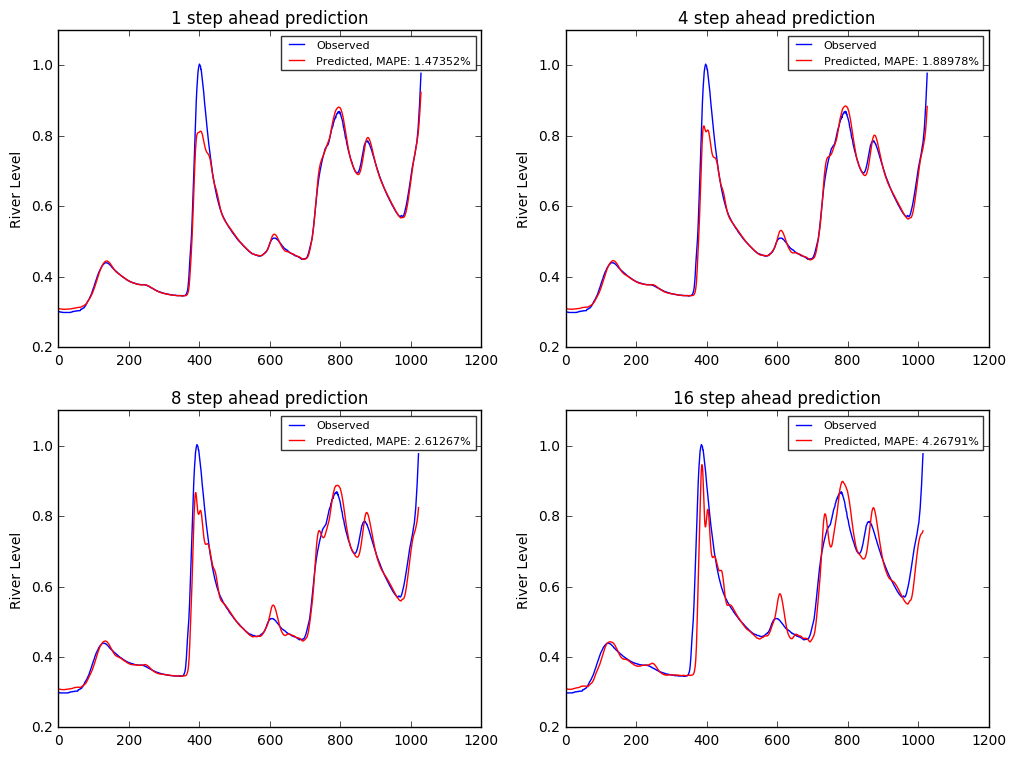

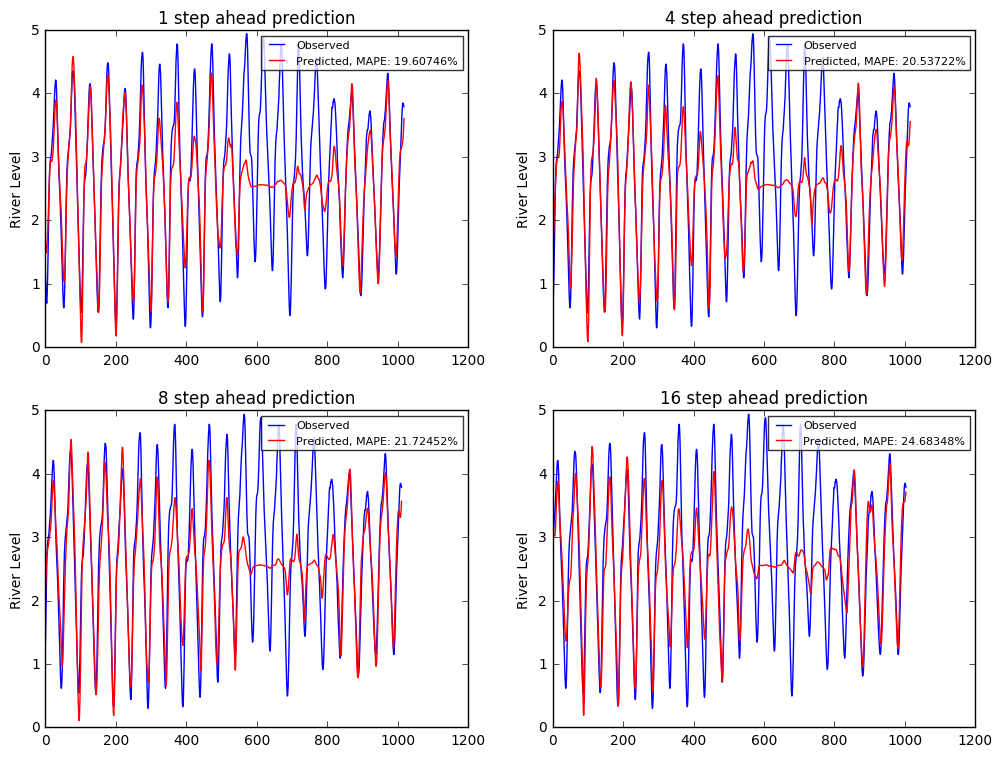

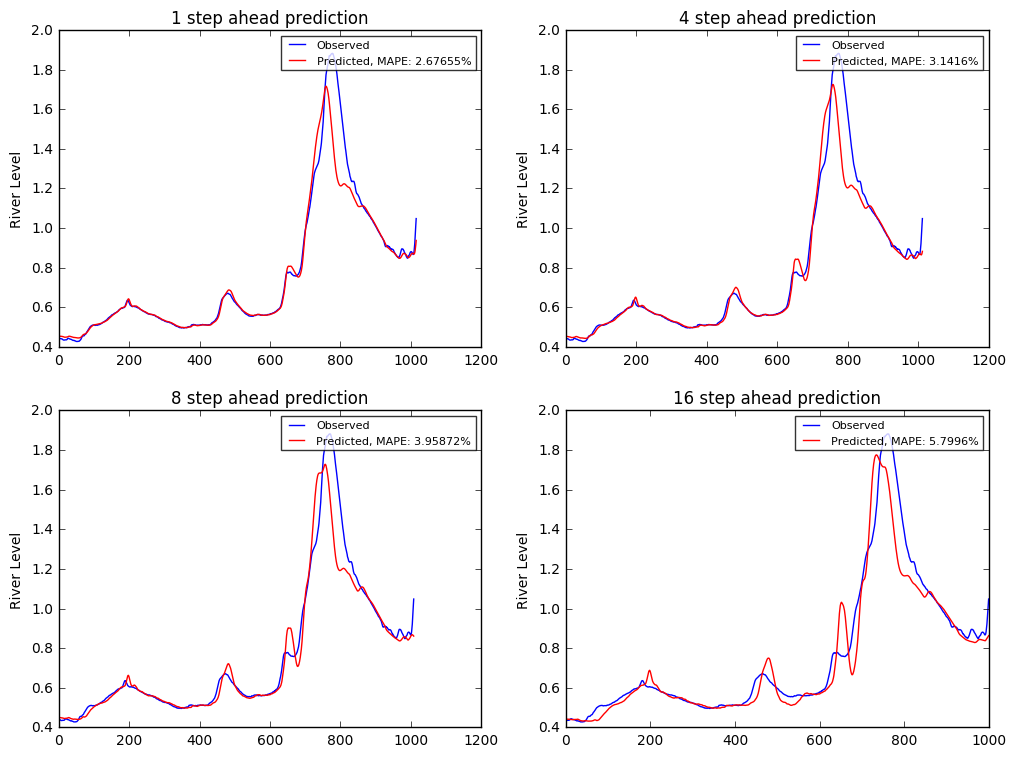

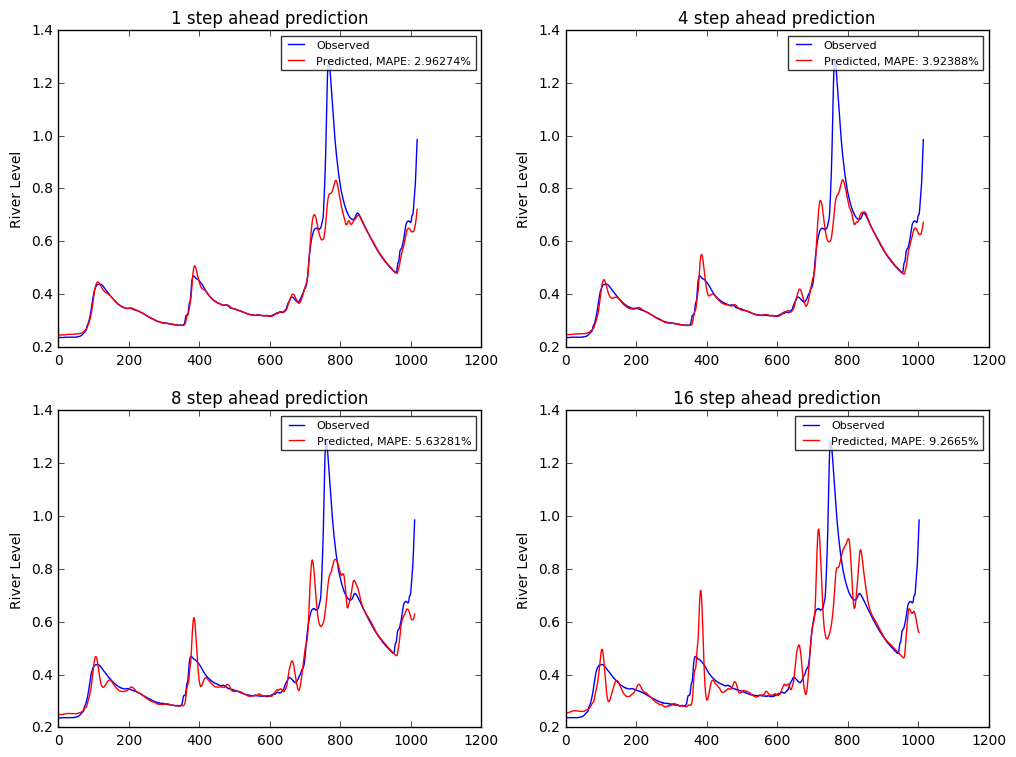

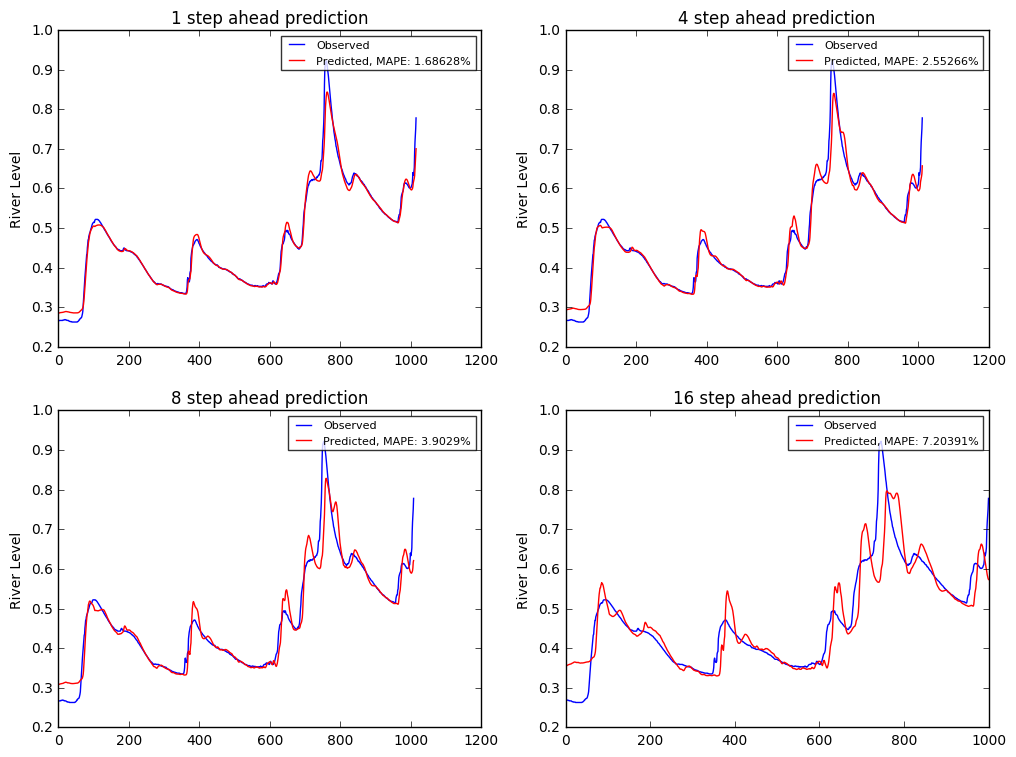

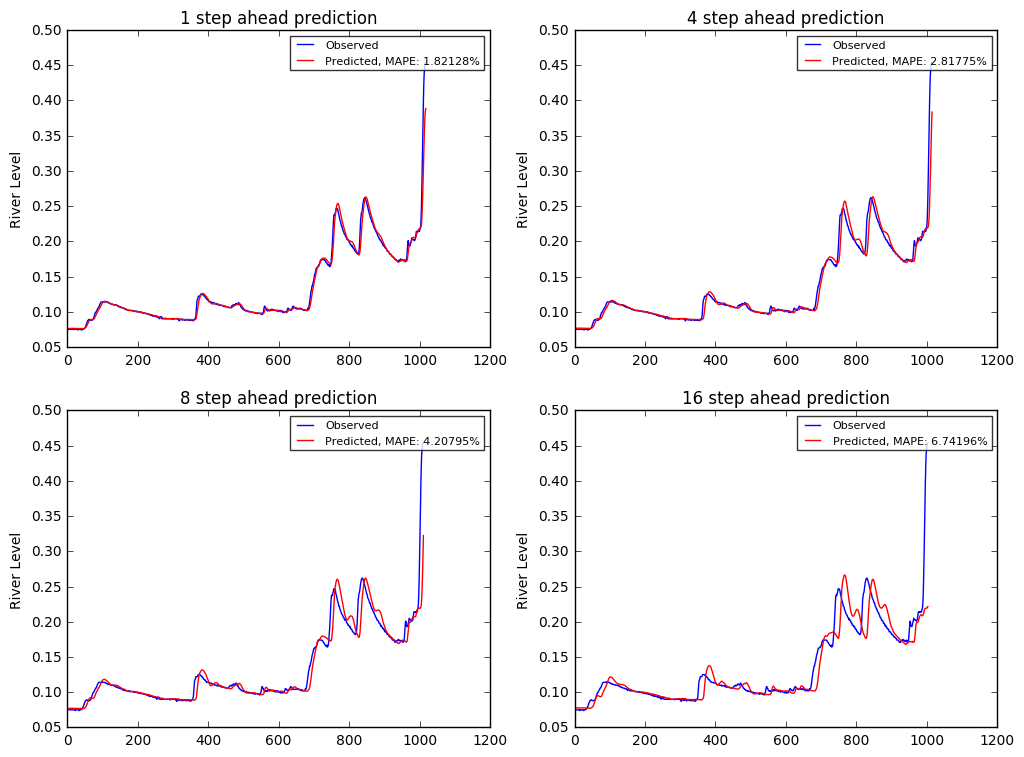

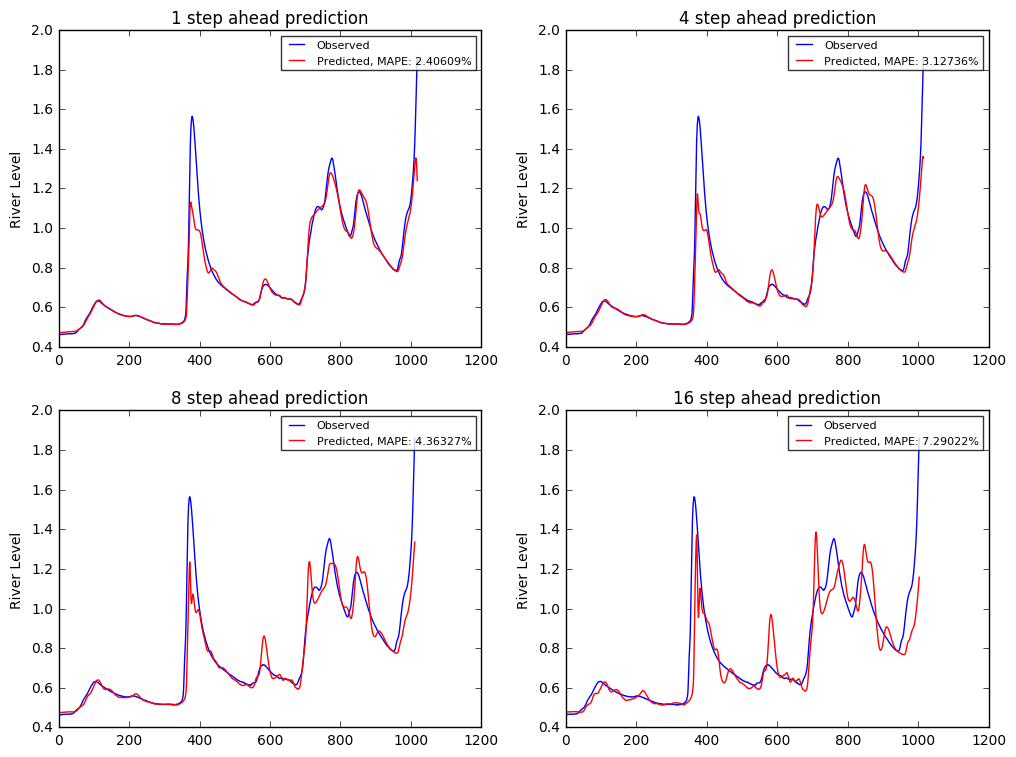

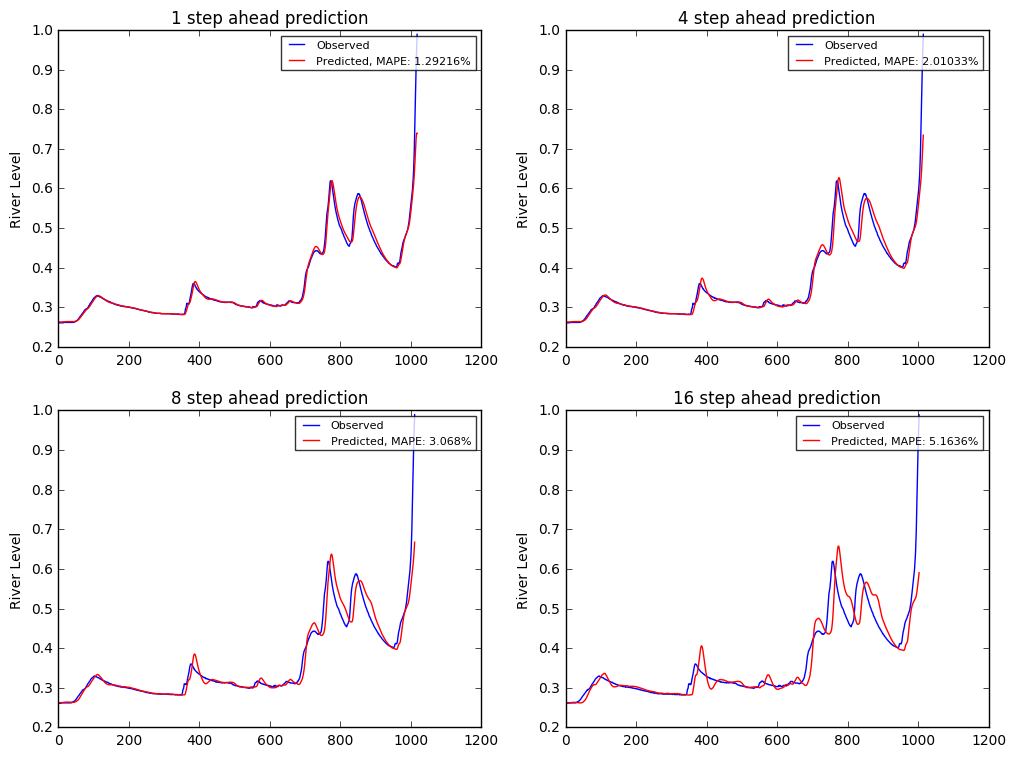

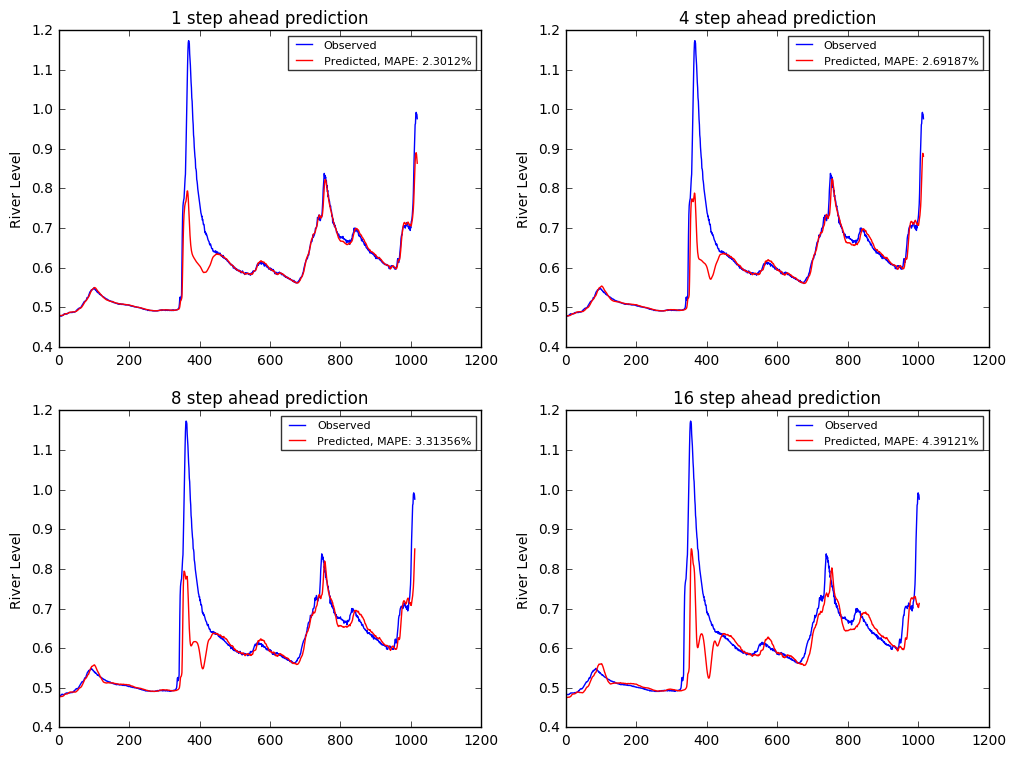

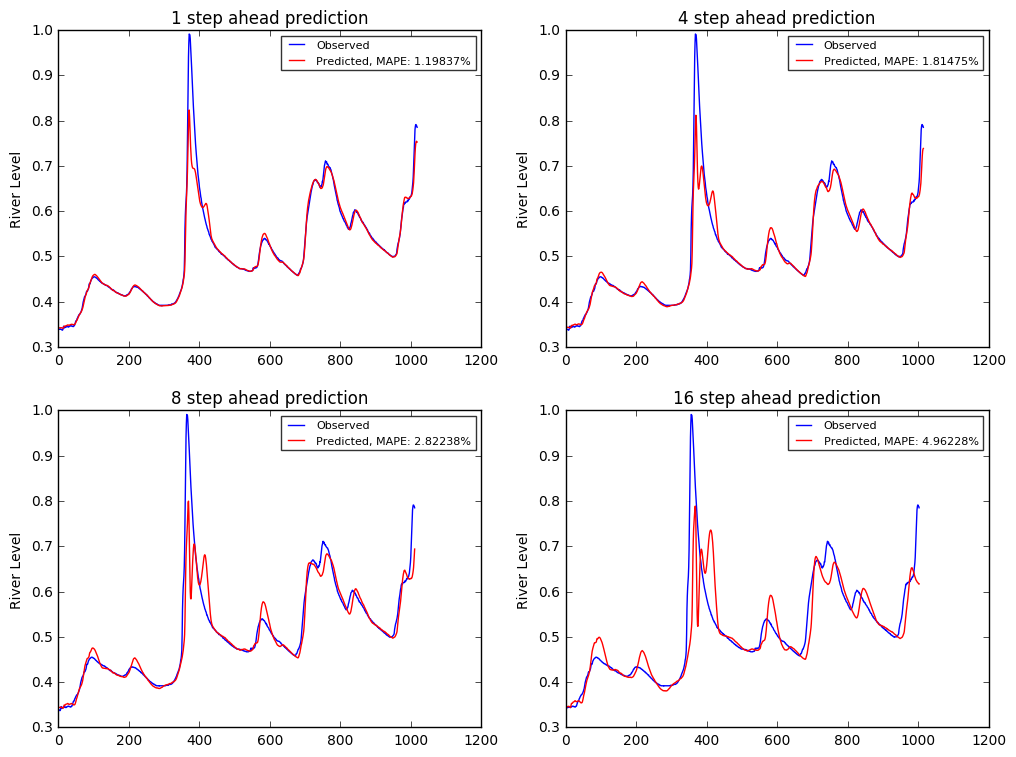

[[1.4735249557762671, 1.5924209165537802, 1.7329931788608655, 1.8897831642138929, 2.058770680890162, 2.2362371607034741, 2.4222319345141949, 2.6126662169865944, 2.807584861896069, 3.0081972958661067, 3.2135912537778202, 3.4212440943257016, 3.6310044735811382, 3.8429734216781761, 4.0550561646968308, 4.2679129233665609, 4.480830218781386, 4.6936703406372606, 4.9084585748435341, 5.1303132473598714], [19.607462376297807, 19.925550776008503, 20.235742952432318, 20.537219951974802, 20.796641384807195, 21.076237734887222, 21.402144560046047, 21.724521037763449, 22.100017968501227, 22.456507284245916, 22.821409867475069, 23.18426078216131, 23.565366301685646, 23.954244186578517, 24.342751990177767, 24.683475041493196, 24.997387282631205, 25.242947482147677, 25.395408998559425, 25.432517558109215], [2.6765520441187101, 2.8205750940072778, 2.9758937027274128, 3.1416016569812988, 3.3235685610034205, 3.5238832995378173, 3.7390173056279954, 3.9587230788460417, 4.1797227567013193, 4.4067826554325986

In [11]:
results = []

for i in range(1, 11):
    river_results = []
    for j in range(1, 21):
        look_ahead = j
        riverstation_id = i
        
        river = all_levels[all_levels['riverstation_id'] == riverstation_id]['level'].values
        river = river.reshape(len(river), 1)

        #standardize data
        #river_mean, river_std = river.mean(), river.std()
        #river = preprocessing.scale(river).reshape(len(river), 1)

        train, test = train_test_split(river, split)
        train_x, train_y = create_datasets(train, look_back, look_ahead)
        test_x, test_y = create_datasets(test, look_back, look_ahead)
        gpr = GaussianProcessRegressor(n_restarts_optimizer = 10, alpha = 0.1, normalize_y=True)
        gpr.fit(train_x, train_y)
        pred_train = gpr.predict(train_x)
        pred_test = gpr.predict(test_x)

        #reverse scale
        #pred_train = reverse_scale(pred_train, river_mean, river_std)
        #pred_test = reverse_scale(pred_test, river_mean, river_std)
        #test_y = reverse_scale(test_y, river_mean, river_std)
        #train_y = reverse_scale(train_y, river_mean, river_std)

        score = mean_absolute_percentage(test_y, pred_test)
        river_results.append(score)
        
        if(j == 1):
            plt.subplot(221)
            plt.plot(test_y, label="Observed")
            plt.plot(pred_test, color="red", label="Predicted, MAPE: "+ str(round(score, 5))+"%")
            plt.title("1 step ahead prediction")
            plt.ylabel("River Level")
            plt.legend(loc=1, fontsize = 8, framealpha=0.8)
            
            
        if(j == 4):
            plt.subplot(222)
            plt.plot(test_y, label="Observed")
            plt.plot(pred_test, color="red", label="Predicted, MAPE: "+ str(round(score, 5))+"%")
            plt.title("4 step ahead prediction")
            plt.ylabel("River Level")
            plt.legend(loc=1, fontsize = 8, framealpha=0.8)
            
            
        if(j == 8):
            plt.subplot(223)
            plt.plot(test_y, label="Observed")
            plt.plot(pred_test, color="red", label="Predicted, MAPE: "+ str(round(score, 5))+"%")
            plt.title("8 step ahead prediction")
            plt.ylabel("River Level")
            plt.legend(loc=1, fontsize = 8, framealpha=0.8)
            
            
        if(j == 16):
            plt.subplot(224)
            plt.plot(test_y, label="Observed")
            plt.plot(pred_test, color="red", label="Predicted, MAPE: "+ str(round(score, 5))+"%")
            plt.title("16 step ahead prediction")
            plt.legend(loc=1, fontsize = 8, framealpha=0.8)
            plt.ylabel("River Level")
            plt.show()
            
    results.append(river_results)
    
print results

In [12]:
averages = []
for i in range(20):
    sum = 0
    for r in results:
        sum+=r[i]
    averages.append(sum/10)
    print i+1, " & ",round(sum/10, 3), "\% \\\\"
    print '\hline'
    


1  &  3.743 \% \\
\hline
2  &  3.96 \% \\
\hline
3  &  4.199 \% \\
\hline
4  &  4.451 \% \\
\hline
5  &  4.709 \% \\
\hline
6  &  4.981 \% \\
\hline
7  &  5.267 \% \\
\hline
8  &  5.561 \% \\
\hline
9  &  5.861 \% \\
\hline
10  &  6.164 \% \\
\hline
11  &  6.47 \% \\
\hline
12  &  6.777 \% \\
\hline
13  &  7.082 \% \\
\hline
14  &  7.385 \% \\
\hline
15  &  7.684 \% \\
\hline
16  &  7.977 \% \\
\hline
17  &  8.265 \% \\
\hline
18  &  8.542 \% \\
\hline
19  &  8.807 \% \\
\hline
20  &  9.059 \% \\
\hline


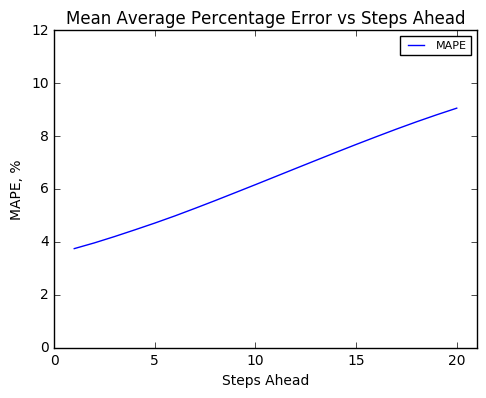

In [15]:
plt.subplot(221)
plt.plot(range(1,21),averages, label="MAPE")
plt.title("Mean Average Percentage Error vs Steps Ahead")
plt.ylabel("MAPE, %")
plt.xlabel("Steps Ahead")
plt.legend(loc=1, fontsize=8)
plt.ylim([0,12])
plt.xlim([0, 21])
plt.show()

In [2]:
gaussian = [  
    3.743,   
    3.96,   
    4.199,   
    4.451,
    4.709,   
    4.981,
    5.267,
    5.561,
    5.861,
    6.164,
    6.47,
    6.777,
    7.082,
    7.385,
    7.684,
    7.977,
    8.265,
    8.542,
    8.807,
    9.059
]

In [3]:
svr = [1.294,
       1.591,
       1.916,
       2.258,2.593,2.939,3.276,3.579,3.88,4.15,4.406,4.655,4.897,5.134,5.396,5.649,5.905,6.155,6.412,6.653]

In [4]:
rnn= [2.156,
      2.437,
      2.74 ,
      3.121 ,
      3.516 ,
      3.886 ,4.209 , 4.487 ,4.744 ,5.008 ,5.297 ,5.603 ,5.91 ,6.211 ,6.522 , 6.83 ,7.134 ,7.454 ,7.807 ,8.209 ]

In [5]:

for i in range(20):
    
    print i+1, " & ",rnn[i], "\% & ",svr[i],"\% & ",gaussian[i], "\% \\\\"
    print '\hline'

1  &  2.156 \% &  1.294 \% &  3.743 \% \\
\hline
2  &  2.437 \% &  1.591 \% &  3.96 \% \\
\hline
3  &  2.74 \% &  1.916 \% &  4.199 \% \\
\hline
4  &  3.121 \% &  2.258 \% &  4.451 \% \\
\hline
5  &  3.516 \% &  2.593 \% &  4.709 \% \\
\hline
6  &  3.886 \% &  2.939 \% &  4.981 \% \\
\hline
7  &  4.209 \% &  3.276 \% &  5.267 \% \\
\hline
8  &  4.487 \% &  3.579 \% &  5.561 \% \\
\hline
9  &  4.744 \% &  3.88 \% &  5.861 \% \\
\hline
10  &  5.008 \% &  4.15 \% &  6.164 \% \\
\hline
11  &  5.297 \% &  4.406 \% &  6.47 \% \\
\hline
12  &  5.603 \% &  4.655 \% &  6.777 \% \\
\hline
13  &  5.91 \% &  4.897 \% &  7.082 \% \\
\hline
14  &  6.211 \% &  5.134 \% &  7.385 \% \\
\hline
15  &  6.522 \% &  5.396 \% &  7.684 \% \\
\hline
16  &  6.83 \% &  5.649 \% &  7.977 \% \\
\hline
17  &  7.134 \% &  5.905 \% &  8.265 \% \\
\hline
18  &  7.454 \% &  6.155 \% &  8.542 \% \\
\hline
19  &  7.807 \% &  6.412 \% &  8.807 \% \\
\hline
20  &  8.209 \% &  6.653 \% &  9.059 \% \\
\hline


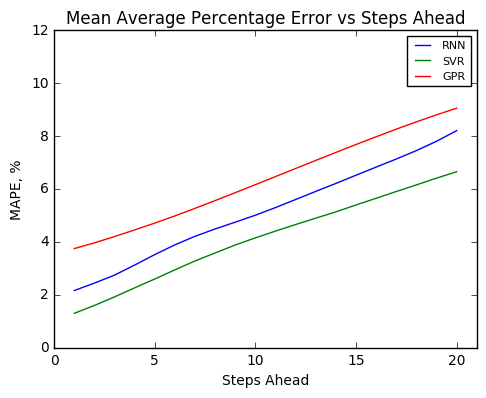

In [6]:
plt.subplot(221)
plt.plot(range(1,21),rnn, label="RNN")
plt.plot(range(1,21),svr, label="SVR")
plt.plot(range(1,21),gaussian, label="GPR")
plt.title("Mean Average Percentage Error vs Steps Ahead")
plt.ylabel("MAPE, %")
plt.xlabel("Steps Ahead")
plt.legend(loc=1, fontsize=8)
plt.ylim([0,12])
plt.xlim([0, 21])
plt.show()